In [1]:
import pandas as pd
import numpy as np
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv("D:/homework/04.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day',inplace=True)
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1991-02-10,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1991-04-03,43.70,49.00,49.00,49.00,49.00,100.0,4900.0
1991-04-04,49.00,48.76,48.76,48.76,48.76,300.0,14628.0
1991-04-05,48.76,48.52,48.52,48.52,48.52,200.0,9704.0
1991-04-06,48.52,48.28,48.28,48.28,48.28,700.0,33796.0
...,...,...,...,...,...,...,...
1992-03-30,23.90,23.90,25.20,23.80,24.90,777200.0,19152135.0
1992-03-31,24.90,25.05,26.30,25.05,26.05,883200.0,22801470.0
1992-04-01,26.05,26.35,27.05,26.35,26.90,796500.0,21328475.0


In [3]:
data_new=data['1991':'1992-04'].copy()
data_new['Close']=pd.to_numeric(data_new['Close'])
data_new['Preclose']=pd.to_numeric(data_new['Preclose'])
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1991-02-10,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1991-04-03,43.70,49.00,49.00,49.00,49.00,100.0,4900.0
1991-04-04,49.00,48.76,48.76,48.76,48.76,300.0,14628.0
1991-04-05,48.76,48.52,48.52,48.52,48.52,200.0,9704.0
1991-04-06,48.52,48.28,48.28,48.28,48.28,700.0,33796.0
...,...,...,...,...,...,...,...
1992-03-30,23.90,23.90,25.20,23.80,24.90,777200.0,19152135.0
1992-03-31,24.90,25.05,26.30,25.05,26.05,883200.0,22801470.0
1992-04-01,26.05,26.35,27.05,26.35,26.90,796500.0,21328475.0


In [4]:
data_new['Return']=(data_new['Close']/data_new['Preclose']) - 1
data_new['Return_2']=0
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return,Return_2
Day,,,,,,,,,
1991-02-10,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,0
1991-04-03,43.70,49.00,49.00,49.00,49.00,100.0,4900.0,0.121281,0
1991-04-04,49.00,48.76,48.76,48.76,48.76,300.0,14628.0,-0.004898,0
1991-04-05,48.76,48.52,48.52,48.52,48.52,200.0,9704.0,-0.004922,0
1991-04-06,48.52,48.28,48.28,48.28,48.28,700.0,33796.0,-0.004946,0
...,...,...,...,...,...,...,...,...,...
1992-03-30,23.90,23.90,25.20,23.80,24.90,777200.0,19152135.0,0.041841,0
1992-03-31,24.90,25.05,26.30,25.05,26.05,883200.0,22801470.0,0.046185,0
1992-04-01,26.05,26.35,27.05,26.35,26.90,796500.0,21328475.0,0.032630,0


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #自定义图表风格

%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei']#指定默认字体
mpl.rcParams['font.family']='Times New Roman'#指定默认字体

In [6]:
data = pd.read_csv("D:/homework/04.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1991-02-10,NaN,0.00,0.00,0.00,0.00,0.0,0.0,NaN
1991-04-03,0.00,49.00,49.00,49.00,49.00,100.0,4900.0,inf
1991-04-04,49.00,48.76,48.76,48.76,48.76,300.0,14628.0,-0.004898
1991-04-05,48.76,48.52,48.52,48.52,48.52,200.0,9704.0,-0.004922
1991-04-06,48.52,48.28,48.28,48.28,48.28,700.0,33796.0,-0.004946
...,...,...,...,...,...,...,...,...
1992-03-30,23.90,23.90,25.20,23.80,24.90,777200.0,19152135.0,0.041841
1992-03-31,24.90,25.05,26.30,25.05,26.05,883200.0,22801470.0,0.046185
1992-04-01,26.05,26.35,27.05,26.35,26.90,796500.0,21328475.0,0.032630


In [7]:
data_new = data['1991-02-10':'1992-04-03'].copy()
Month_data=data_new.resample('ME')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Return
Day,
1991-02-28,0.000000
1991-03-31,0.000000
1991-04-30,inf
1991-05-31,-0.113276
1991-06-30,-0.104448
1991-07-31,-0.039396
1991-08-31,-0.060274
1991-09-30,-0.026667
1991-10-31,0.707937


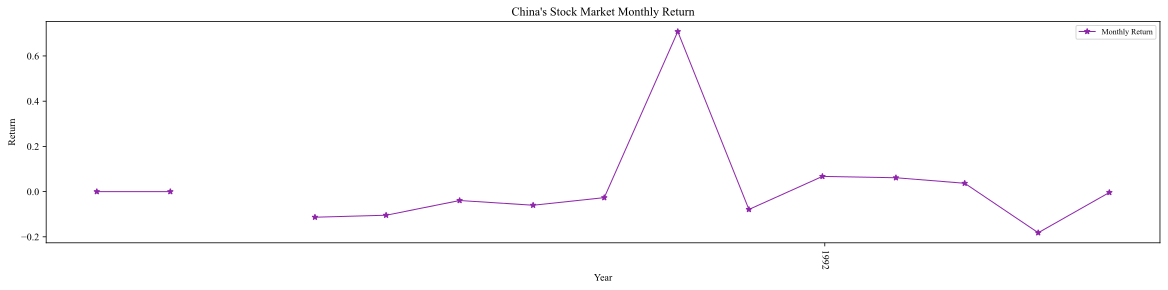

In [8]:
fig, ax=plt.subplots(figsize=(20,4))

ax.plot('Return',#图片数据
'*-',#图片类型
color='#8E24AA',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_data)#图片数据来源

ax.set_title("China's Stock Market Monthly Return")
ax.set_ylabel('Return')
ax.set_xlabel('Year')
#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=270)
#添加图例
plt.legend(loc='upper right',fontsize=8)
#保存图片
fig.savefig('China_Stock_Market_Monthly_Return.pdf')
plt.show();

In [9]:
Month_data['1991':'1991']

,Return
Day,
1991-02-28,0.000000
1991-03-31,0.000000
1991-04-30,inf
1991-05-31,-0.113276
1991-06-30,-0.104448
1991-07-31,-0.039396
1991-08-31,-0.060274
1991-09-30,-0.026667
1991-10-31,0.707937


In [10]:
Quarter_data = data_new.resample('QE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Year_data=data_new.resample('YE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
Quarter_data
Year_data

,Return
Day,
1991-12-31,inf
1992-12-31,-0.103239


In [11]:
print('中国股票市场收益率年化均值是：',Year_data['1990':'2023']['Return'].mean().round(3)*100,'%')

中国股票市场收益率年化均值是： inf %


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #自定义图表风格

%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from matplotlib.font_manager import FontProperties #画图自定义字体
from pylab import mpl #画图自定义字体
mpl.rcParams['font.sans-serif']=['SimHei']#指定默认字体
mpl.rcParams['font.family']='Times New Roman'#指定默认字体

In [13]:
data = pd.read_csv("D:/homework/04.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data['Close']=pd.to_numeric(data['Close'],errors='coerce')
data['Preclose']=data['Close'].shift(1)
data['Return']=(data['Close']-data['Preclose'])/data['Preclose']
data

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Return
Day,,,,,,,,
1991-02-10,NaN,0.00,0.00,0.00,0.00,0.0,0.0,NaN
1991-04-03,0.00,49.00,49.00,49.00,49.00,100.0,4900.0,inf
1991-04-04,49.00,48.76,48.76,48.76,48.76,300.0,14628.0,-0.004898
1991-04-05,48.76,48.52,48.52,48.52,48.52,200.0,9704.0,-0.004922
1991-04-06,48.52,48.28,48.28,48.28,48.28,700.0,33796.0,-0.004946
...,...,...,...,...,...,...,...,...
1992-03-30,23.90,23.90,25.20,23.80,24.90,777200.0,19152135.0,0.041841
1992-03-31,24.90,25.05,26.30,25.05,26.05,883200.0,22801470.0,0.046185
1992-04-01,26.05,26.35,27.05,26.35,26.90,796500.0,21328475.0,0.032630


In [14]:
print('中国股票市场平均月收益率为：',round(Month_data['1990':'2024']['Return'].mean()*100,4),"%",sep='')

中国股票市场平均月收益率为：inf%


In [15]:
Quarter_data=data_new.resample('QE')['Return'].apply(lambda x:(1+x).prod()-1).to_frame()
print('中国股票市场平均季度收益率为：',round(Quarter_data['1990':'2024']['Return'].mean()*100,4),"%",sep='')

中国股票市场平均季度收益率为：inf%


In [16]:
Month_data[Month_data['Return']>0.052147828136706396]

,Return
Day,
1991-04-30,inf
1991-10-31,0.707937
1991-12-31,0.067273
1992-01-31,0.061329


In [17]:
Month_variance=data_new.resample('ME')['Return'].var().to_frame()
Month_variance.rename(columns={'Return':'Variance'},inplace=True)
Month_variance

,Variance
Day,
1991-02-28,NaN
1991-03-31,NaN
1991-04-30,NaN
1991-05-31,5.680205e-09
1991-06-30,6.739198e-09
1991-07-31,1.211517e-08
1991-08-31,4.534116e-04
1991-09-30,2.451220e-04
1991-10-31,6.055282e-03


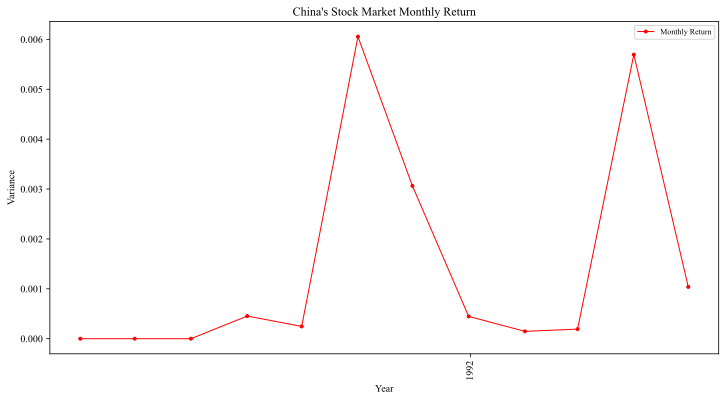

In [18]:
fig, ax=plt.subplots(figsize=(12,6))

ax.plot('Variance',#图片数据
'.-',#图片类型
color='r',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_variance['1991':])#图片数据来源
ax.set_title("China's Stock Market Monthly Return")#图片标题

ax.set_ylabel('Variance')#图片y轴标签
ax.set_xlabel('Year')#图片x轴标签

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转置x轴的日期显示格式
plt.xticks(rotation=90)

#添加图例
plt.legend(loc='upper right',fontsize=8)
plt.show();

In [19]:
Month_variance=data_new.resample('ME')['Return'].apply(lambda x: sum(x**2)).to_frame()
Month_variance.rename(columns={'Return':'Variance'},inplace=True)
Month_variance

,Variance
Day,
1991-02-28,NaN
1991-03-31,0.000000
1991-04-30,NaN
1991-05-31,NaN
1991-06-30,NaN
1991-07-31,NaN
1991-08-31,NaN
1991-09-30,NaN
1991-10-31,NaN


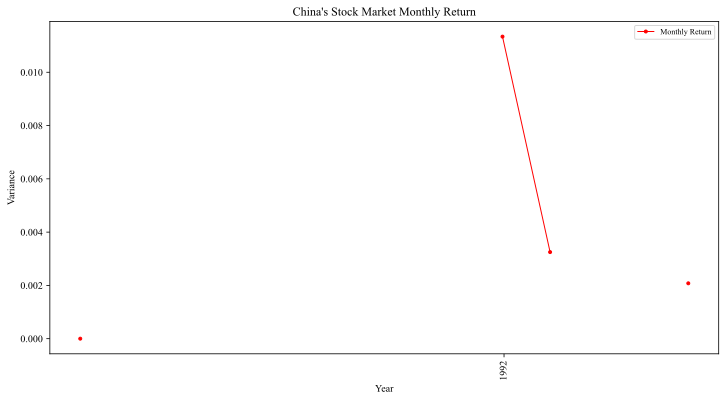

In [20]:
fig, ax=plt.subplots(figsize=(12,6))

ax.plot('Variance',#图片数据
'.-',#图片类型
color='r',#图片颜色
label='Monthly Return',#图片标签
linewidth=1,#图片线宽
data=Month_variance['1991':])#图片数据来源
ax.set_title("China's Stock Market Monthly Return")#图片标题

ax.set_ylabel('Variance')#图片y轴标签
ax.set_xlabel('Year')#图片x轴标签

#设置x轴的日期显示格式
data_format=mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator())

#转置x轴的日期显示格式
plt.xticks(rotation=90)

#添加图例
plt.legend(loc='upper right',fontsize=8)
plt.show();

In [21]:
# 日数据偏度
data_new['Return'].skew()

d:\lockon\Lib\site-packages\pandas\core\nanops.py:1256: RuntimeWarning: invalid value encountered in subtract
  adjusted = values - mean


np.float64(nan)

In [22]:
import pandas as pd
import numpy as np 
import scipy.stats as stats #统计模块
import scipy
#import pymysql #导入数据库模块

from datetime import datetime #时间模块
import statsmodels.formula.api as smf # OLS regression

import matplotlib.pyplot as plt #画图模块
import matplotlib.dates as mdates #日期格式处理模块
from matplotlib import style #自定义图表风格

from matplotlib.font_manager import FontProperties #作图中文
from pylab import mpl #画图自定义字体
#mpl.rcParams['font.sans-serif']=['SimHei']#指定默认字体
#mpl.rcParams['font.family']='Times New Roman'#指定默认字体

#输出矢量图 渲染矢量图
%matplotlib inline
%config InlineBackend.figure_format='svg' #提高分辨率

from IPython.core.interactiveshell import InteractiveShell #jupyter运行输出的模块
#显示每一个运行的结果
InteractiveShell.ast_node_interactivity='all'

#设置行不限制数量
#pd.set_option('display.max_rows',None)

#设置列不限制数量
pd.set_option('display.max_columns',None)

In [23]:
data = pd.read_csv("D:/homework/04.csv")
data['Day'] = pd.to_datetime(data['Day'],format='%Y/%m/%d')
data.set_index('Day', inplace = True)
data.sort_values(by = ['Day'],axis=0, ascending=True)

,Preclose,Open,Highest,Lowest,Close,Volume,Money
Day,,,,,,,
1991-02-10,0.00,0.00,0.00,0.00,0.00,0.0,0.0
1991-04-03,43.70,49.00,49.00,49.00,49.00,100.0,4900.0
1991-04-04,49.00,48.76,48.76,48.76,48.76,300.0,14628.0
1991-04-05,48.76,48.52,48.52,48.52,48.52,200.0,9704.0
1991-04-06,48.52,48.28,48.28,48.28,48.28,700.0,33796.0
...,...,...,...,...,...,...,...
1992-03-30,23.90,23.90,25.20,23.80,24.90,777200.0,19152135.0
1992-03-31,24.90,25.05,26.30,25.05,26.05,883200.0,22801470.0
1992-04-01,26.05,26.35,27.05,26.35,26.90,796500.0,21328475.0


In [24]:
data_new=data['1991-02':'1992-04'].copy()
data_new['Close'] = pd.to_numeric(data_new['Close'])
data_new['Preclose']=pd.to_numeric(data_new['Preclose'])
data_new['Raw_return']=data_new['Close']/data_new['Preclose']-1
data_new

,Preclose,Open,Highest,Lowest,Close,Volume,Money,Raw_return
Day,,,,,,,,
1991-02-10,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN
1991-04-03,43.70,49.00,49.00,49.00,49.00,100.0,4900.0,0.121281
1991-04-04,49.00,48.76,48.76,48.76,48.76,300.0,14628.0,-0.004898
1991-04-05,48.76,48.52,48.52,48.52,48.52,200.0,9704.0,-0.004922
1991-04-06,48.52,48.28,48.28,48.28,48.28,700.0,33796.0,-0.004946
...,...,...,...,...,...,...,...,...
1992-03-30,23.90,23.90,25.20,23.80,24.90,777200.0,19152135.0,0.041841
1992-03-31,24.90,25.05,26.30,25.05,26.05,883200.0,22801470.0,0.046185
1992-04-01,26.05,26.35,27.05,26.35,26.90,796500.0,21328475.0,0.032630


In [25]:
Month_data=data_new.resample('ME')['Raw_return'].apply(lambda x:(1+x).prod()-1).to_frame()
Month_data

,Raw_return
Day,
1991-02-28,0.000000
1991-03-31,0.000000
1991-04-30,-0.000458
1991-05-31,0.237173
1991-06-30,-0.113459
1991-07-31,-0.130921
1991-08-31,-0.492214
1991-09-30,-0.026667
1991-10-31,0.842466


In [26]:
Month_data['1991-02':'1992-04']['Raw_return'].max()
Month_data['1991-02':'1992-04']['Raw_return'].min()

np.float64(0.8424657534246562)

np.float64(-0.4922139471902506)

In [27]:
Month_data_fix = Month_data['1991-02':'1992-04'].copy()
Month_data_fix

,Raw_return
Day,
1991-02-28,0.000000
1991-03-31,0.000000
1991-04-30,-0.000458
1991-05-31,0.237173
1991-06-30,-0.113459
1991-07-31,-0.130921
1991-08-31,-0.492214
1991-09-30,-0.026667
1991-10-31,0.842466


In [28]:
Month_data_fix[Month_data_fix['Raw_return']>Month_data_fix['Raw_return'].quantile(0.99)]=Month_data_fix['Raw_return'].quantile(0.99)
Month_data_fix[Month_data_fix['Raw_return']<Month_data_fix['Raw_return'].quantile(0.01)]=Month_data_fix['Raw_return'].quantile(0.01)
Month_data_fix

,Raw_return
Day,
1991-02-28,0.000000
1991-03-31,0.000000
1991-04-30,-0.000458
1991-05-31,0.237173
1991-06-30,-0.113459
1991-07-31,-0.130921
1991-08-31,-0.441633
1991-09-30,-0.026667
1991-10-31,0.758987


In [29]:
Month_data['Raw_return'].describe().round(6)
Month_data_fix['Raw_return'].describe().round(6)

count    15.000000
mean      0.048135
std       0.276950
min      -0.492214
25%      -0.015253
50%       0.000000
75%       0.064301
max       0.842466
Name: Raw_return, dtype: float64

count    15.000000
mean      0.045942
std       0.252981
min      -0.441633
25%      -0.015253
50%       0.000000
75%       0.064301
max       0.758987
Name: Raw_return, dtype: float64

In [30]:
stats.ttest_1samp(Month_data['2000-01':]['Raw_return'],0)

C:\Users\lockon\AppData\Local\Temp\ipykernel_51256\1901038706.py:1: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stats.ttest_1samp(Month_data['2000-01':]['Raw_return'],0)


TtestResult(statistic=np.float64(nan), pvalue=np.float64(nan), df=np.float64(nan))

In [31]:
np.mean(Month_data['1991-02':]['Raw_return'])

np.float64(0.048134734855554036)

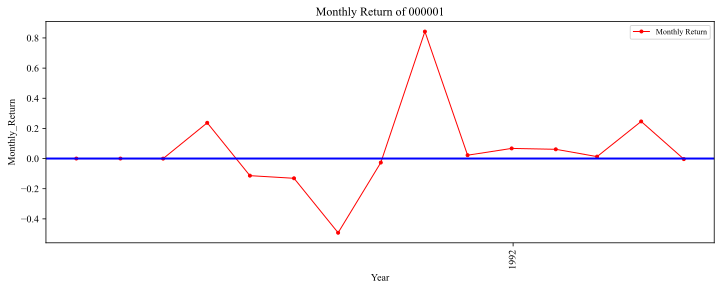

In [32]:
fig, ax = plt.subplots(figsize = (12,4))

ax.plot('Raw_return', # 图片数据
'.-', # 图片类型,
color = 'r', # 图片颜色
label = 'Monthly Return', # 图片标签
linewidth = 1, # 图片线宽
data = Month_data['1991-02':]) # 图片数据来源
ax.set_title("Monthly Return of 000001") # 图片标题
ax.set_ylabel('Monthly_Return') # 图片y轴标签
ax.set_xlabel('Year') # 图片x轴标签

# 添加一条y=0的参考线
plt.axhline(y=0, color='blue', linewidth=2)

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(data_format)
ax.xaxis.set_major_locator(mdates.YearLocator(1))

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

# 添加图例
plt.legend(loc='upper right',fontsize = 8)
plt.show();


In [33]:
inflation = pd.read_csv("D:/homework/shuju.csv")
inflation['month'] = pd.to_datetime(inflation['month'],format='%Y/%m/%d')
inflation.set_index('month',inplace=True)
inflation

,cpi1,cpi2
month,,
1991-01-31,105.1,104.4
1991-02-28,105.4,105.3
1991-03-31,105.8,105.4
1991-04-30,106.7,105.9
1991-05-31,107.6,106.5
1991-06-30,107.8,101.2
1991-07-31,107.8,105.2
1991-08-31,108.2,106.5
1991-09-30,107.7,105.8


In [34]:
reg_data = pd.merge(Month_data, inflation, left_index=True, right_index=True,how='left')
reg_data

,Raw_return,cpi1,cpi2
Day,,,
1991-02-28,0.000000,105.4,105.3
1991-03-31,0.000000,105.8,105.4
1991-04-30,-0.000458,106.7,105.9
1991-05-31,0.237173,107.6,106.5
1991-06-30,-0.113459,107.8,101.2
1991-07-31,-0.130921,107.8,105.2
1991-08-31,-0.492214,108.2,106.5
1991-09-30,-0.026667,107.7,105.8
1991-10-31,0.842466,107.5,105.3


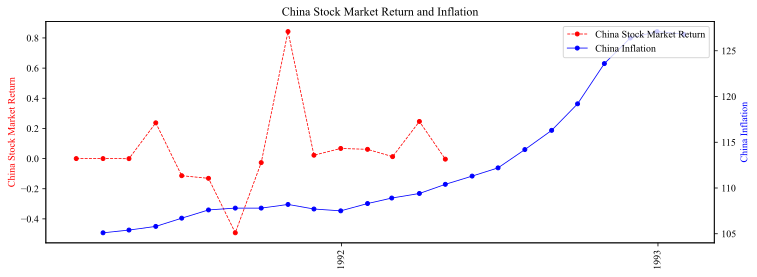

In [35]:
# Plot the China's stock market return and inflation into one graph
fig, ax1 = plt.subplots(figsize=(12,4))
# the linewidth and marker size are set to be very small
ax1.plot(reg_data['Raw_return'],color='red',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='--',label='China Stock Market Return')
ax1.set_ylabel('China Stock Market Return',color='red')
#ax1.set_xlabel('Month')

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)

ax2 = ax1.twinx()
ax2.plot(inflation['cpi1'].shift(2),color='blue',marker='o',linewidth=0.8,
         markersize=4,
         linestyle='-',label='China Inflation')

ax2.set_ylabel('China Inflation',color='blue')

plt.title('China Stock Market Return and Inflation')

# change the legend into one box
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

# save figure
#fig.savefig('images/China Stock Market Return and Inflation.png',dpi = 1000,bbox_inches='tight')

plt.show();

In [36]:
inflation['cpi1'].describe().round(5)

count     25.00000
mean     113.56000
std        8.14437
min      105.10000
25%      107.70000
50%      109.40000
75%      119.20000
max      127.90000
Name: cpi1, dtype: float64

In [37]:
inflation['cpi1'].skew()
inflation['cpi1'].kurt()
inflation['cpi2'].skew()
inflation['cpi2'].kurt()

np.float64(0.8599216391175992)

np.float64(-0.9137900053330066)

np.float64(1.048837631379018)

np.float64(-0.49306751225191103)

In [38]:
reg_data['lcpi1'] = reg_data['cpi1'].shift(1)
model_cpi = smf.ols('Raw_return ~ lcpi1',
                 data=reg_data['1991-01':'1993-01']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.088
Method:                 Least Squares   F-statistic:                     1.624
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.229
Time:                        19:53:19   Log-Likelihood:                -1.9532
No. Observations:                  13   AIC:                             7.906
Df Residuals:                      11   BIC:                             9.036
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0865      0.853      1.274      0.2

d:\lockon\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [39]:
reg_data['lcpi2'] = reg_data['cpi2'].shift(1)
model_cpi = smf.ols('Raw_return ~ lcpi2',
                 data=reg_data['1991-01':'1993-01']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.069
Method:                 Least Squares   F-statistic:                     1.863
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.199
Time:                        19:53:19   Log-Likelihood:                -1.8405
No. Observations:                  13   AIC:                             7.681
Df Residuals:                      11   BIC:                             8.811
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4935      1.863     -1.339      0.1

d:\lockon\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [40]:
model_cpi = smf.ols('Raw_return ~ lcpi2+lcpi1',
                 data=reg_data['1991-01':'1993-01']).fit(
                     cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_cpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                 -0.154
Method:                 Least Squares   F-statistic:                     6.226
Date:                Thu, 21 Nov 2024   Prob (F-statistic):             0.0175
Time:                        19:53:19   Log-Likelihood:                -1.7159
No. Observations:                  13   AIC:                             9.432
Df Residuals:                      10   BIC:                             11.13
Df Model:                           2                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6063      1.544     -0.393      0.6

d:\lockon\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


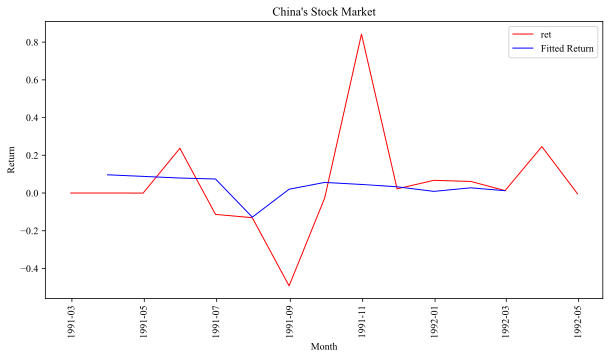

In [41]:
data = reg_data['1991-01':'1993-01'].copy()
data['fitted_return'] =  model_cpi.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot('Raw_return',
         '-r',
         label='ret',
         linewidth=1,
         data=data)
plt.plot('fitted_return',
         '-b',
         label='Fitted Return',
         linewidth=1,
         data=data)
plt.title("China's Stock Market")
plt.xlabel('Month')  # 画图的x轴名称
plt.ylabel('Return')  # 画图的y轴名称

# 设置x轴的日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())

# 转置x轴的日期显示格式
plt.xticks(rotation = 90)
plt.legend()
#fig.savefig('images/fitted_return.pdf', bbox_inches='tight')  # 更改输出图片格式 jpg
plt.show();

In [42]:
Q_reg_data = reg_data['1991-02':'1992-04'].resample('QE').apply({
    'Raw_return':
    lambda x: (1 + x).prod() - 1,
    'cpi1':
    lambda x: sum(x)
})
Q_reg_data['lag_cpi1'] = Q_reg_data['cpi1'].shift(1)
Q_reg_data

,Raw_return,cpi1,lag_cpi1
Day,,,
1991-03-31,0.000000,211.2,NaN
1991-06-30,0.096303,322.1,211.2
1991-09-30,-0.570462,323.7,322.1
1991-12-31,1.010274,324.7,323.7
1992-03-31,0.339602,NaN,324.7
1992-06-30,-0.003839,112.2,NaN


In [43]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

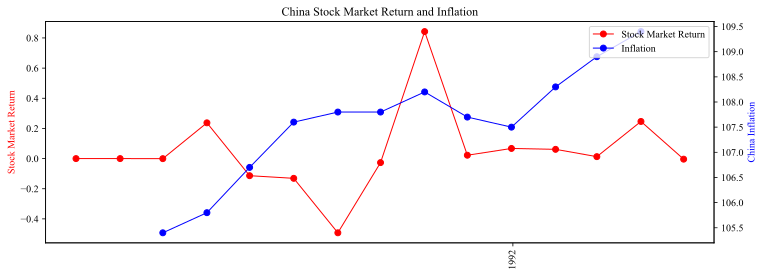

In [44]:
# Plot the China's stock market return and inflation into one graph
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(reg_data['Raw_return'], 
         color='r', 
         marker='o',
         linewidth=1,
         label='Stock Market Return')
ax1.set_ylabel('Stock Market Return', color='r')

# 设置x轴日期显示格式
data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(reg_data['cpi1'].shift(2), 
         color='b', 
         marker='o',
         linewidth=1,
         label='Inflation')
ax2.set_ylabel('China Inflation', color='b')

plt.title('China Stock Market Return and Inflation')

# 显示图例
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show();


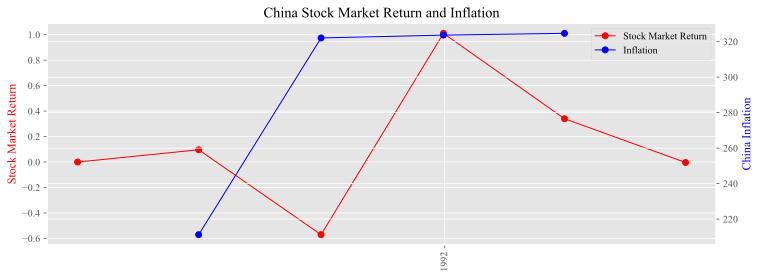

In [45]:
plt.style.use('ggplot')
fig, ax1 = plt.subplots(figsize=(12, 4))

ax1.plot(Q_reg_data['Raw_return'],
            color='r',
            marker='o',
            linewidth=1,
            label='Stock Market Return')
ax1.set_ylabel('Stock Market Return', color='r')

data_format = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_formatter(data_format)
ax1.xaxis.set_major_locator(mdates.YearLocator())
plt.xticks(rotation=90)

ax2 = ax1.twinx()
ax2.plot(Q_reg_data['cpi1'].shift(1),
            color='b',
            marker='o',
            linewidth=1,
            label='Inflation')
ax2.set_ylabel('China Inflation', color='b')

plt.title('China Stock Market Return and Inflation')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')

plt.show();

In [46]:
Q_reg_data['lcpi1'] = Q_reg_data['cpi1'].shift(1)/100
model_qcpi = smf.ols('Raw_return ~ lcpi1', data=Q_reg_data['1991-02':]).fit(
    cov_type='HAC', cov_kwds={'maxlags': 6})
print(model_qcpi.summary())

                            OLS Regression Results                            
Dep. Variable:             Raw_return   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.471
Method:                 Least Squares   F-statistic:                     1.476
Date:                Thu, 21 Nov 2024   Prob (F-statistic):              0.348
Time:                        19:53:19   Log-Likelihood:                -3.3568
No. Observations:                   4   AIC:                             10.71
Df Residuals:                       2   BIC:                             9.486
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2550      0.280     -0.909      0.3

d:\lockon\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


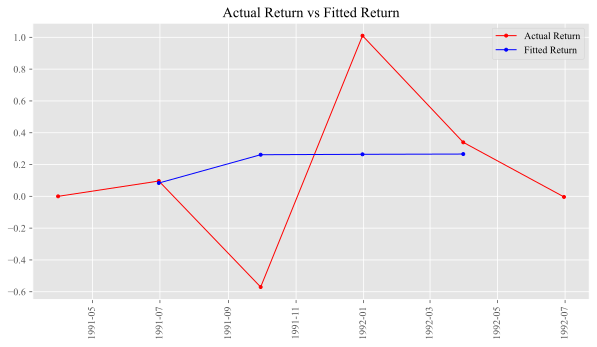

In [47]:
data_qfit = Q_reg_data['1991-02':].copy()
data_qfit['fitted_return'] = model_qcpi.fittedvalues

fig = plt.figure(figsize=(10, 5))
plt.plot(data_qfit['Raw_return'],
         '.-r',
        linewidth = 1,
        label='Actual Return')
plt.plot(data_qfit['fitted_return'],
         '.-b',
        linewidth = 1,
        label='Fitted Return')

plt.title('Actual Return vs Fitted Return')
plt.legend()

plt.xticks(rotation=90)
plt.show();